# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë

In [2]:
import yfinance as yf
import pandas as pd

def dollar_indicator():
    tickers = {
        "S&P500": "^GSPC",
        "DowJones": "^DJI",
        "NASDAQ": "^IXIC"
    }
    
    data_list = []
    
    for name, symbol in tickers.items():
        ticker = yf.Ticker(symbol)
        df = ticker.history(period="25y", interval="1d")
        df = df.reset_index()
        
    
        df = df[["Date", "Open", "High", "Low", "Close"]]
        df = df.rename(columns={
            "Open": f"{name}_Open",
            "High": f"{name}_High",
            "Low": f"{name}_Low",
            "Close": f"{name}_Close"
        })
        df["Date"] = pd.to_datetime(df["Date"]).dt.tz_localize(None)
        data_list.append(df)
    
    df_merged = data_list[0]
    for df in data_list[1:]:
        df['Date']=pd.to_datetime(df['Date'])
        df_merged = pd.merge(df_merged, df, on="Date", how="inner")
    
    df_merged['Date'] = pd.to_datetime(df_merged['Date']).dt.strftime('%Y-%m-%d')
    df_merged['Date'] = pd.to_datetime(df_merged['Date'])
    return df_merged

In [3]:
import cloudpickle
with open("dollar_indicator.pkl", "wb") as f:
    cloudpickle.dump(dollar_indicator, f)

In [4]:
dollar_indi_df=dollar_indicator()

In [5]:
def real_times(symbol):
    ticker = yf.Ticker(symbol)
    df = ticker.history(period=f"25y", interval="1d")
    
    df = df.copy()
    df = df[["Open", "High", "Low", "Close"]]
    df.columns = [f"{col}" for col in df.columns]
    df["Date"] = df.index.date
    df.reset_index(drop=True, inplace=True)
    # Î≥ÄÎèôÎüâ Í≥ÑÏÇ∞
    df["Change"] = df["Close"].diff()
    
    df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
    
    df=df.reindex(columns=['Date','Close','Open','High','Low','Change'])
    return df

In [6]:
import cloudpickle
with open("real_times.pkl", "wb") as f:
    cloudpickle.dump(real_times, f)

In [7]:
dollar_df=real_times('USDKRW=X')

In [8]:
all_df=pd.merge(dollar_indi_df,dollar_df,on='Date',how='inner')

In [9]:
all_df

Date  S&P500_Open  S&P500_High   S&P500_Low  S&P500_Close  \
0    2003-12-01  1058.199951  1070.469971  1058.199951   1070.119995   
1    2003-12-02  1070.119995  1071.219971  1065.219971   1066.619995   
2    2003-12-03  1066.619995  1074.300049  1064.630005   1064.729980   
3    2003-12-04  1064.729980  1070.369995  1063.150024   1069.719971   
4    2003-12-05  1069.719971  1069.719971  1060.089966   1061.500000   
...         ...          ...          ...          ...           ...   
5411 2025-07-22  6306.600098  6316.120117  6281.709961   6309.620117   
5412 2025-07-23  6326.899902  6360.640137  6317.490234   6358.910156   
5413 2025-07-24  6368.600098  6381.310059  6360.569824   6363.350098   
5414 2025-07-25  6370.009766  6395.819824  6368.529785   6388.640137   
5415 2025-07-28  6397.689941  6401.069824  6375.790039   6389.770020   

      DowJones_Open  DowJones_High  DowJones_Low  DowJones_Close  \
0       9785.349609    9902.230469   9785.349609     9899.049805   
1       9899.639648    9900.450195   9837.269531     9853.639648   
2       9851.940430    9942.009766   9851.419922     9873.419922   
3       9874.830078    9933.860352   9865.780273     9930.820312   
4       9923.269531    9923.419922   9846.309570     9862.679688   
...             ...            ...           ...             ...   
5411   44338.621094   44542.531250  44272.601562    44502.441406   
5412   44661.121094   45016.710938  44638.441406    45010.289062   
5413   44776.410156   44912.269531  44674.570312    44693.910156   
5414   44757.281250   44944.460938  44650.589844    44901.921875   
5415   44946.980469   44946.980469  44739.960938    44837.558594   

       NASDAQ_Open   NASDAQ_High    NASDAQ_Low  NASDAQ_Close        Close  \
0      1972.969971   1989.819946   1968.540039   1989.819946  1198.400024   
1      1986.800049   1996.079956   1978.229980   1980.069946  1195.000000   
2      1989.140015   2000.920044   1960.130005   1960.250000  1192.500000   
3      1966.920044   1971.250000   1942.670044   1968.800049  1190.099976   
4      1949.260010   1960.390015   1935.579956   1937.819946  1184.699951   
...            ...           ...           ...           ...          ...   
5411  20982.210938  20985.339844  20750.900391  20892.689453  1381.819946   
5412  20966.470703  21023.849609  20870.669922  21020.019531  1379.780029   
5413  21083.820312  21113.099609  21001.679688  21057.960938  1373.719971   
5414  21059.939453  21159.800781  21036.849609  21108.320312  1372.000000   
5415  21176.400391  21202.179688  21122.119141  21178.580078  1382.780029   

             Open         High          Low     Change  
0     1197.300049  1203.500000  1195.000000        NaN  
1     1198.099976  1198.500000  1186.199951  -3.400024  
2     1195.000000  1198.400024  1192.500000  -2.500000  
3     1192.599976  1197.900024  1174.800049  -2.400024  
4     1189.400024  1193.800049  1178.599976  -5.400024  
...           ...          ...          ...        ...  
5411  1381.819946  1388.969971  1379.890015  -8.750000  
5412  1379.780029  1381.380005  1373.390015  -2.039917  
5413  1373.719971  1373.910034  1363.979980  -6.060059  
5414  1372.000000  1383.449951  1370.079956  -1.719971  
5415  1382.780029  1388.530029  1377.000000  10.780029  

[5416 rows x 18 columns]

In [10]:
df_base=all_df

# EDA

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

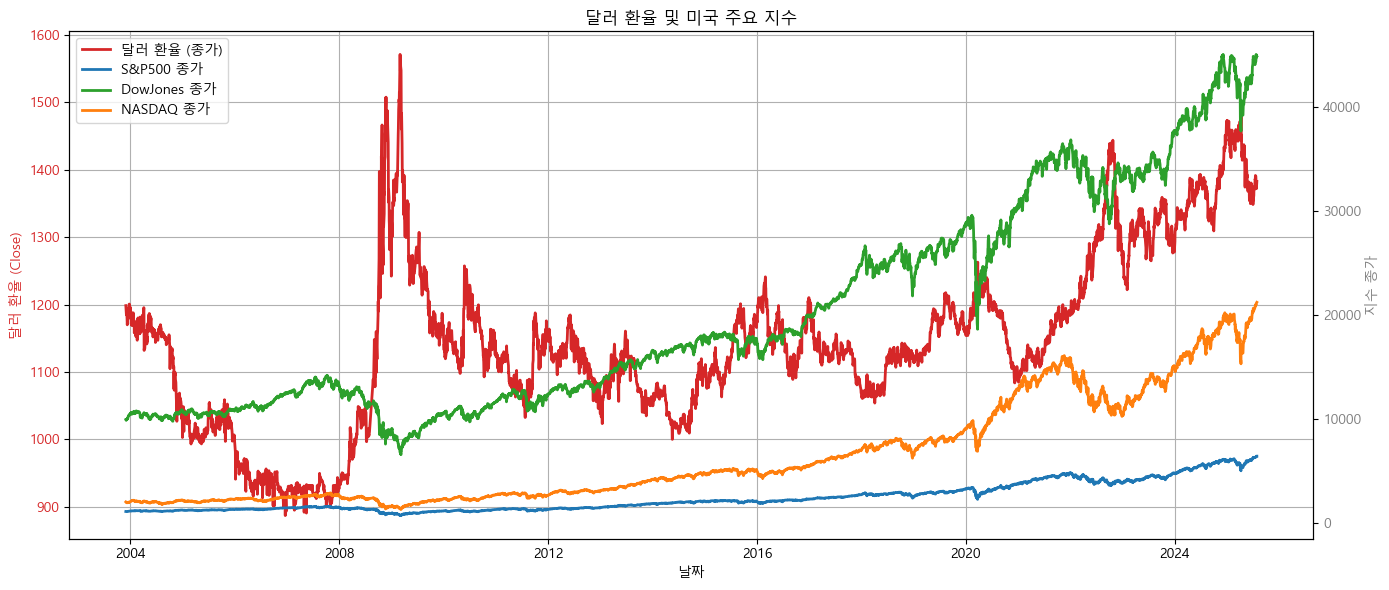

In [13]:
import matplotlib.pyplot as plt

# Ïù¥Ï§ë Ï∂ï ÏÉùÏÑ±
fig, ax1 = plt.subplots(figsize=(14, 6))

# ÏôºÏ™Ω yÏ∂ï: Îã¨Îü¨ ÌôòÏú® (Close)
ax1.plot(df_base['Date'], df_base['Close'], label='Îã¨Îü¨ ÌôòÏú® (Ï¢ÖÍ∞Ä)', color='tab:red', linewidth=2)
ax1.set_xlabel("ÎÇ†Ïßú")
ax1.set_ylabel("Îã¨Îü¨ ÌôòÏú® (Close)", color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True)

# Ïò§Î•∏Ï™Ω yÏ∂ï: Îã¨Îü¨ Ï£ºÏöî ÏßÄÏàò
ax2 = ax1.twinx()
ax2.plot(df_base['Date'], df_base['S&P500_Close'], label='S&P500 Ï¢ÖÍ∞Ä', color='tab:blue', linewidth=2)
ax2.plot(df_base['Date'], df_base['DowJones_Close'], label='DowJones Ï¢ÖÍ∞Ä', color='tab:green', linewidth=2)
ax2.plot(df_base['Date'], df_base['NASDAQ_Close'], label='NASDAQ Ï¢ÖÍ∞Ä', color='tab:orange', linewidth=2)
ax2.set_ylabel("ÏßÄÏàò Ï¢ÖÍ∞Ä", color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

# Î≤îÎ°Ä Î≥ëÌï©
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Ï†úÎ™©Í≥º Î†àÏù¥ÏïÑÏõÉ
plt.title("Îã¨Îü¨ ÌôòÏú® Î∞è ÎØ∏Íµ≠ Ï£ºÏöî ÏßÄÏàò")
plt.tight_layout()
plt.show()

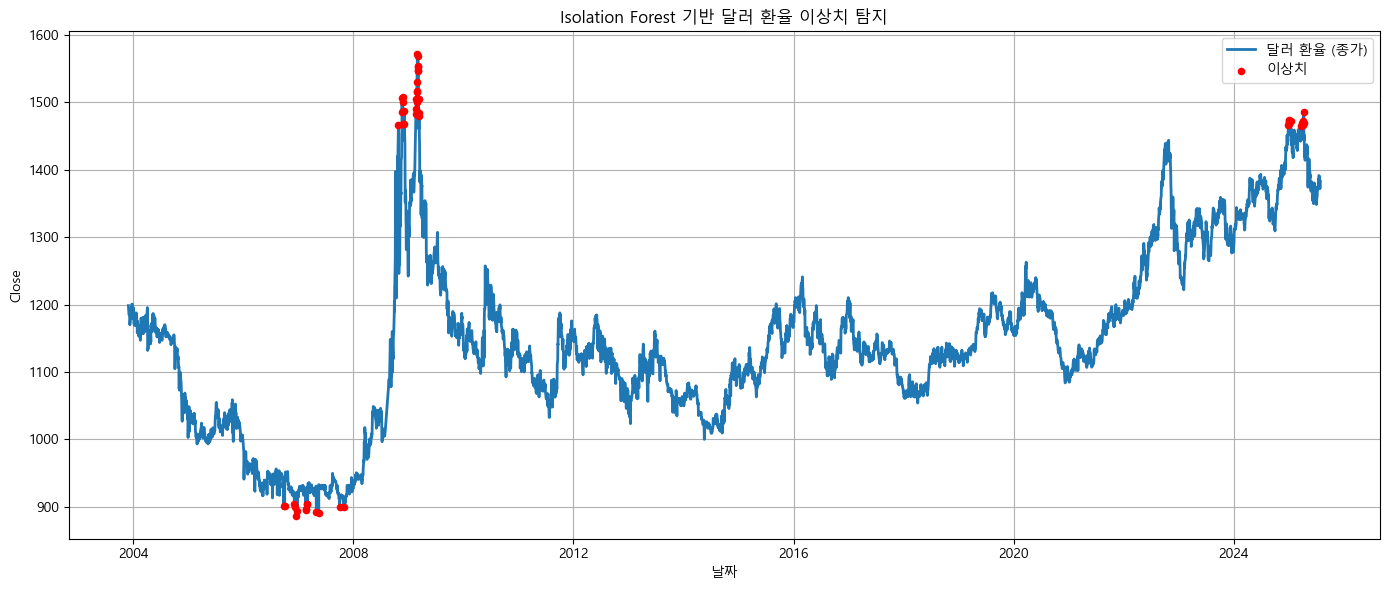

In [14]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1. Í≤∞Ï∏° Ï†úÍ±∞ Î∞è Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = df_base.copy()
df = df[['Date', 'Close']].dropna()

# 2. Isolation Forest Ï†ÅÏö©
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(df[['Close']])

# 3. Ïù¥ÏÉÅÏπò Ï∂îÏ∂ú
anomalies = df[df['anomaly'] == -1]

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Îã¨Îü¨ ÌôòÏú® (Ï¢ÖÍ∞Ä)', color='tab:blue', linewidth=2)
plt.scatter(anomalies['Date'], anomalies['Close'], color='red', label='Ïù¥ÏÉÅÏπò', s=20, zorder=5)
plt.title("Isolation Forest Í∏∞Î∞ò Îã¨Îü¨ ÌôòÏú® Ïù¥ÏÉÅÏπò ÌÉêÏßÄ")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ÌïòÎ£® ÏòàÏ∏°

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step
üìä XGBoost
    MAE:  25.9484
    RMSE: 37.6951
    R¬≤:   0.8215
üìä LSTM
    MAE:  15.5386
    RMSE: 18.8149
    R¬≤:   0.9555
üìä RandomForest
    MAE:  23.0004
    RMSE: 29.3183
    R¬≤:   0.8920


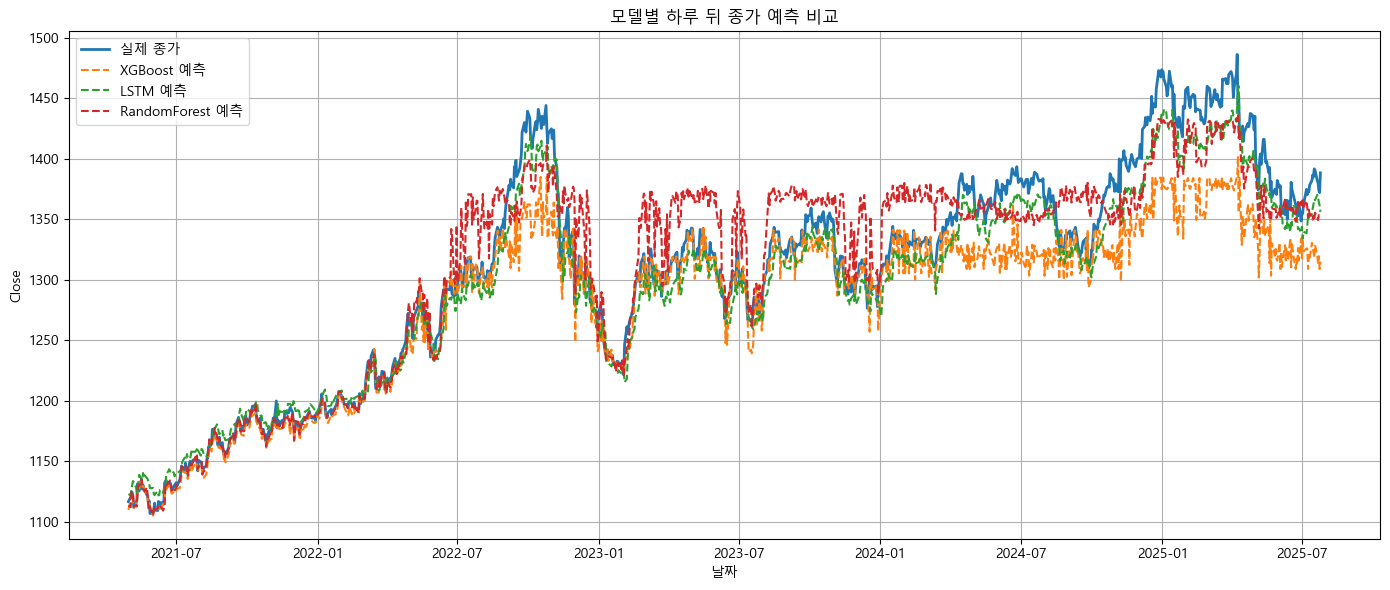

In [26]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = df_base.copy()  # Í∏∞Ï°¥ df_baseÎ•º Ïú†ÏßÄ
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-1)
df = df.dropna().reset_index(drop=True)

# 3. ÌîºÏ≤ò, ÌÉÄÍ≤ü ÏÑ§Ï†ï
drop_cols = ['Date', 'Í∏∞Ï§ÄÎÖÑÏõî', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. Ïã§Ï†úÍ∞í Î≥µÏõê
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. ÏÑ±Îä• Ï∂úÎ†•
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"üìä {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R¬≤:   {r2:.4f}")

# 10. ÏãúÍ∞ÅÌôî
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='Ïã§Ï†ú Ï¢ÖÍ∞Ä', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest ÏòàÏ∏°', linestyle='--')
plt.title("Î™®Îç∏Î≥Ñ ÌïòÎ£® Îí§ Ï¢ÖÍ∞Ä ÏòàÏ∏° ÎπÑÍµê")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
import joblib
joblib.dump(model_lstm, 'dollar_ÌïòÎ£®.pkl')
joblib.dump(scaler_X, 'dollar_scaler_X_ÌïòÎ£®.pkl')
joblib.dump(scaler_y, 'dollar_scaler_y_ÌïòÎ£®.pkl')

['dollar_scaler_y_ÌïòÎ£®.pkl']

# ÏùºÏ£ºÏùº ÏòàÏ∏°

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step
üìä XGBoost
    MAE:  91.5762
    RMSE: 112.1469
    R¬≤:   -0.5848
üìä LSTM
    MAE:  31.6043
    RMSE: 36.8698
    R¬≤:   0.8287
üìä RandomForest
    MAE:  108.3541
    RMSE: 130.1962
    R¬≤:   -1.1360


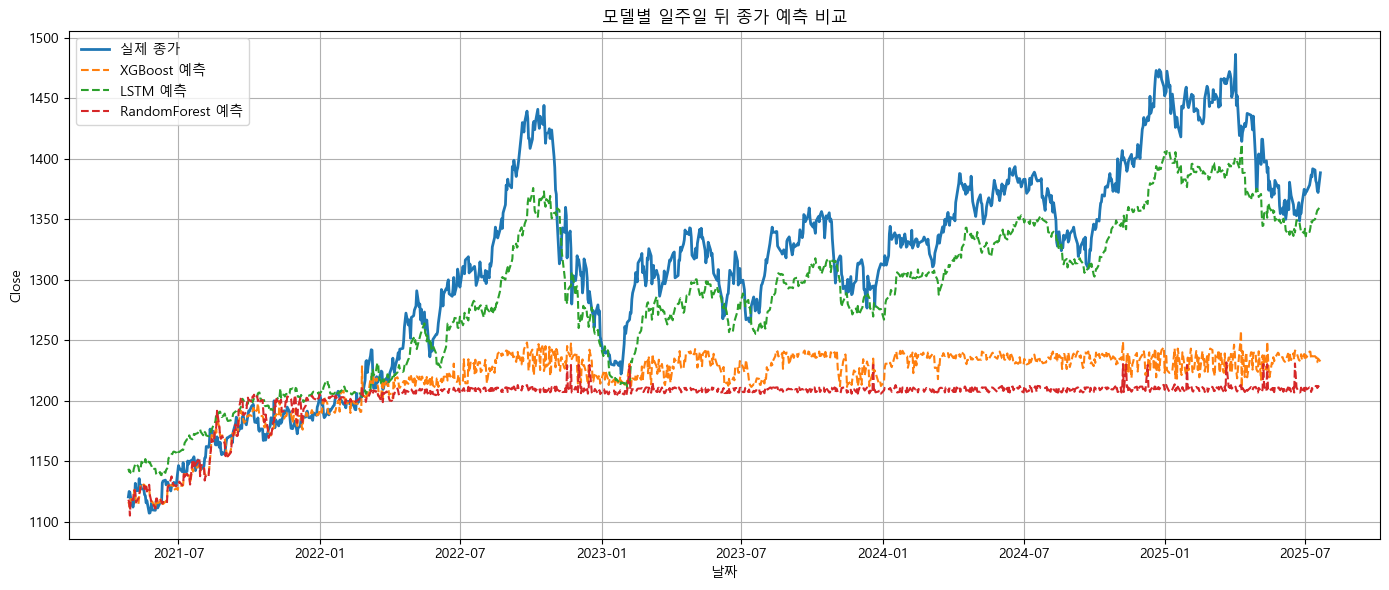

In [28]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = df_base.copy()  # Í∏∞Ï°¥ df_baseÎ•º Ïú†ÏßÄ
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-5)
df = df.dropna().reset_index(drop=True)

# 3. ÌîºÏ≤ò, ÌÉÄÍ≤ü ÏÑ§Ï†ï
drop_cols = ['Date', 'Í∏∞Ï§ÄÎÖÑÏõî', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. Ïã§Ï†úÍ∞í Î≥µÏõê
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. ÏÑ±Îä• Ï∂úÎ†•
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"üìä {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R¬≤:   {r2:.4f}")

# 10. ÏãúÍ∞ÅÌôî
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='Ïã§Ï†ú Ï¢ÖÍ∞Ä', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest ÏòàÏ∏°', linestyle='--')
plt.title("Î™®Îç∏Î≥Ñ ÏùºÏ£ºÏùº Îí§ Ï¢ÖÍ∞Ä ÏòàÏ∏° ÎπÑÍµê")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
import joblib
joblib.dump(model_lstm, 'dollar_ÏùºÏ£ºÏùº.pkl')
joblib.dump(scaler_X, 'dollar_scaler_X_ÏùºÏ£ºÏùº.pkl')
joblib.dump(scaler_y, 'dollar_scaler_y_ÏùºÏ£ºÏùº.pkl')

['dollar_scaler_y_ÏùºÏ£ºÏùº.pkl']

# ÌïúÎã¨ ÏòàÏ∏°

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step
üìä XGBoost
    MAE:  91.6078
    RMSE: 110.8043
    R¬≤:   -0.5616
üìä LSTM
    MAE:  81.3470
    RMSE: 95.5089
    R¬≤:   -0.1602
üìä RandomForest
    MAE:  80.5383
    RMSE: 98.6669
    R¬≤:   -0.2382


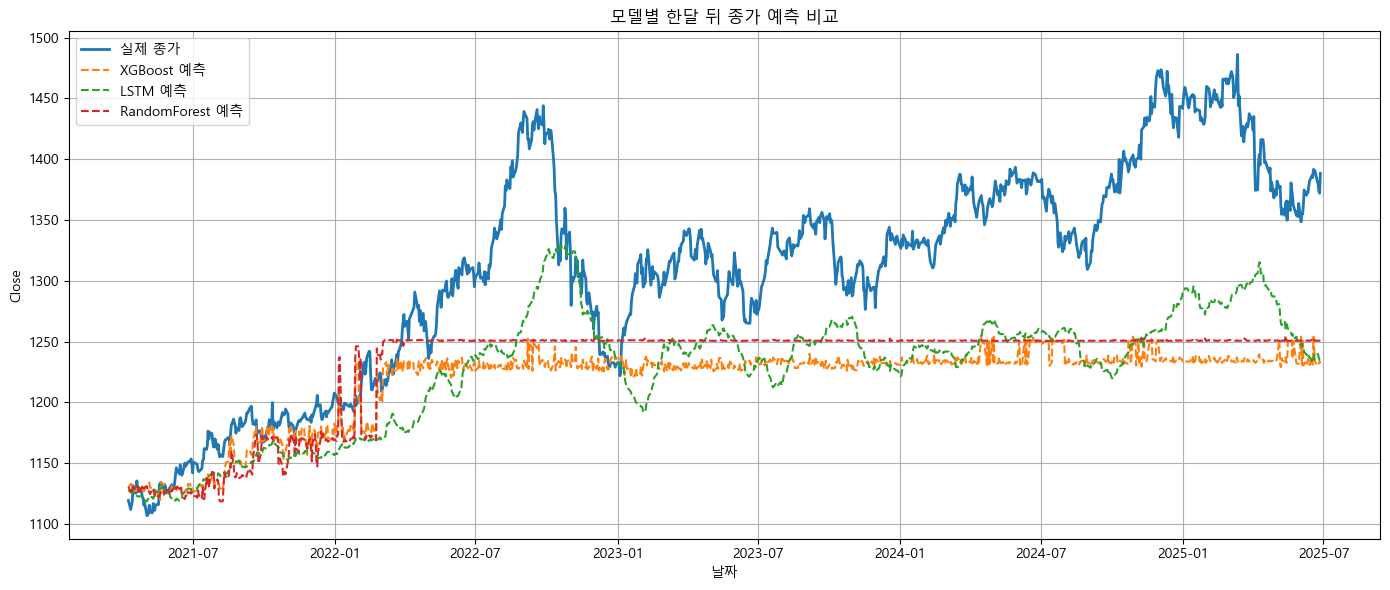

In [30]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = df_base.copy()  # Í∏∞Ï°¥ df_baseÎ•º Ïú†ÏßÄ
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-20)
df = df.dropna().reset_index(drop=True)

# 3. ÌîºÏ≤ò, ÌÉÄÍ≤ü ÏÑ§Ï†ï
drop_cols = ['Date', 'Í∏∞Ï§ÄÎÖÑÏõî', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. Ïã§Ï†úÍ∞í Î≥µÏõê
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. ÏÑ±Îä• Ï∂úÎ†•
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"üìä {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R¬≤:   {r2:.4f}")

# 10. ÏãúÍ∞ÅÌôî
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='Ïã§Ï†ú Ï¢ÖÍ∞Ä', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest ÏòàÏ∏°', linestyle='--')
plt.title("Î™®Îç∏Î≥Ñ ÌïúÎã¨ Îí§ Ï¢ÖÍ∞Ä ÏòàÏ∏° ÎπÑÍµê")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
import joblib
joblib.dump(model_lstm, 'dollar_ÌïúÎã¨.pkl')
joblib.dump(scaler_X, 'dollar_scaler_X_ÌïúÎã¨.pkl')
joblib.dump(scaler_y, 'dollar_scaler_y_ÌïúÎã¨.pkl')

['dollar_scaler_y_ÌïúÎã¨.pkl']

# ÏÑ∏Îã¨ ÏòàÏ∏°

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step
üìä XGBoost
    MAE:  170.6664
    RMSE: 187.0796
    R¬≤:   -3.5692
üìä LSTM
    MAE:  84.9712
    RMSE: 101.7566
    R¬≤:   -0.3518
üìä RandomForest
    MAE:  178.9434
    RMSE: 196.9088
    R¬≤:   -4.0620


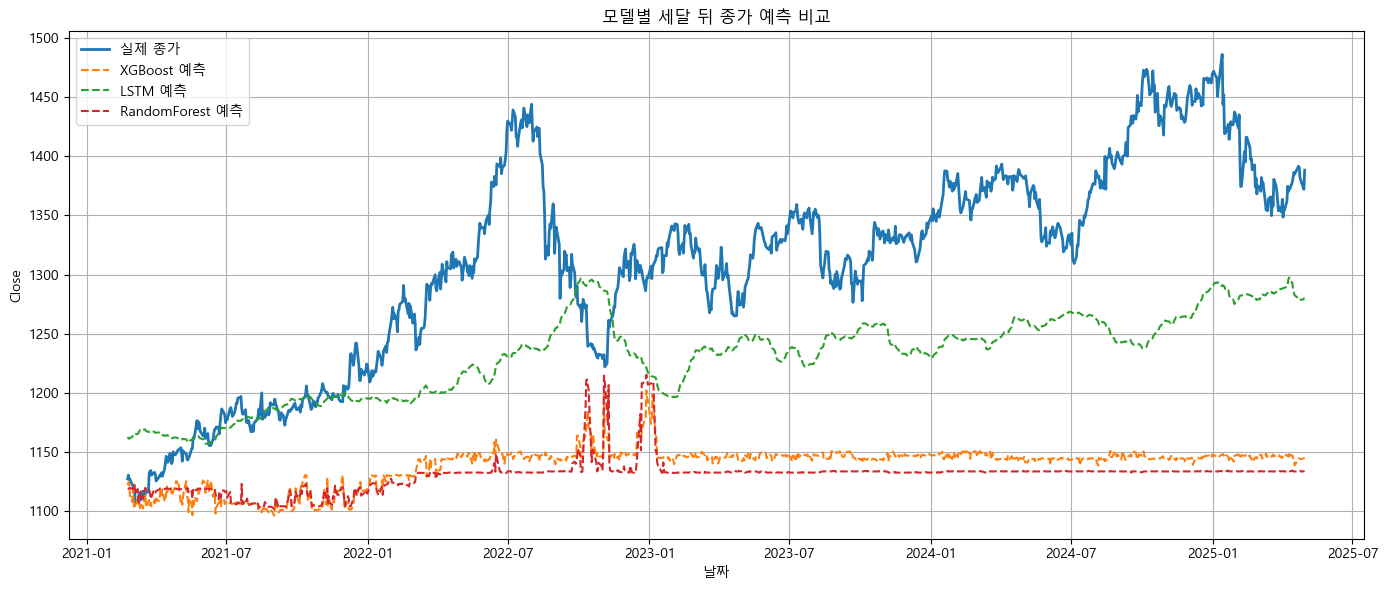

In [32]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = df_base.copy()  # Í∏∞Ï°¥ df_baseÎ•º Ïú†ÏßÄ
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-60)
df = df.dropna().reset_index(drop=True)

# 3. ÌîºÏ≤ò, ÌÉÄÍ≤ü ÏÑ§Ï†ï
drop_cols = ['Date', 'Í∏∞Ï§ÄÎÖÑÏõî', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. Ïã§Ï†úÍ∞í Î≥µÏõê
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. ÏÑ±Îä• Ï∂úÎ†•
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"üìä {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R¬≤:   {r2:.4f}")

# 10. ÏãúÍ∞ÅÌôî
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='Ïã§Ï†ú Ï¢ÖÍ∞Ä', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest ÏòàÏ∏°', linestyle='--')
plt.title("Î™®Îç∏Î≥Ñ ÏÑ∏Îã¨ Îí§ Ï¢ÖÍ∞Ä ÏòàÏ∏° ÎπÑÍµê")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
import joblib
joblib.dump(model_lstm, 'dollar_ÏÑ∏Îã¨.pkl')
joblib.dump(scaler_X, 'dollar_scaler_X_ÏÑ∏Îã¨.pkl')
joblib.dump(scaler_y, 'dollar_scaler_y_ÏÑ∏Îã¨.pkl')

['dollar_scaler_y_ÏÑ∏Îã¨.pkl']

|Î™®Îç∏|ÌïòÎ£®|ÏùºÏ£ºÏùº|ÌïúÎã¨|ÏÑ∏Îã¨|
|---|---|---|---|---|
|XGBoost|0.8215|-0.5848|-0.5616|-3.5692|
|LSTM|0.9707|0.7202|0.7690|-1.0692|
|RandomForest|0.8920|-1.1360|-0.2382|-4.0620|
||||||
|ÏµúÏ¢ÖÎ™®Îç∏|LSTM|LSTM|LSTM|LSTM

In [34]:
def dollar_predict_ÌïòÎ£®(new_df):
    import joblib
    
    scaler_X = joblib.load(f'dollar_scaler_X_ÌïòÎ£®.pkl')

    scaler_y = joblib.load(f'dollar_scaler_y_ÌïòÎ£®.pkl')
    
    model_lstm = joblib.load(f'dollar_ÌïòÎ£®.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    # 6. Í≤∞Í≥º Î∞òÌôò
    return y_pred_lstm

import cloudpickle
with open("dollar_predict_ÌïòÎ£®.pkl", "wb") as f:
    cloudpickle.dump(dollar_predict_ÌïòÎ£®, f)

In [35]:
def dollar_predict_ÏùºÏ£ºÏùº(new_df):
    import joblib
    
    scaler_X = joblib.load(f'dollar_scaler_X_ÏùºÏ£ºÏùº.pkl')

    scaler_y = joblib.load(f'dollar_scaler_y_ÏùºÏ£ºÏùº.pkl')
    
    model_lstm = joblib.load(f'dollar_ÏùºÏ£ºÏùº.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    # 6. Í≤∞Í≥º Î∞òÌôò
    return y_pred_lstm

with open("dollar_predict_ÏùºÏ£ºÏùº.pkl", "wb") as f:
    cloudpickle.dump(dollar_predict_ÏùºÏ£ºÏùº, f)

In [36]:
def dollar_predict_ÌïúÎã¨(new_df):
    import joblib
    
    scaler_X = joblib.load(f'dollar_scaler_X_ÌïúÎã¨.pkl')

    scaler_y = joblib.load(f'dollar_scaler_y_ÌïúÎã¨.pkl')
    
    model_lstm = joblib.load(f'dollar_ÌïúÎã¨.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    # 6. Í≤∞Í≥º Î∞òÌôò
    return y_pred_lstm

with open("dollar_predict_ÌïúÎã¨.pkl", "wb") as f:
    cloudpickle.dump(dollar_predict_ÌïúÎã¨, f)

In [37]:
def dollar_predict_ÏÑ∏Îã¨(new_df):
    import joblib
    
    scaler_X = joblib.load(f'dollar_scaler_X_ÏÑ∏Îã¨.pkl')

    scaler_y = joblib.load(f'dollar_scaler_y_ÏÑ∏Îã¨.pkl')
    
    model_lstm = joblib.load(f'dollar_ÏÑ∏Îã¨.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    # 6. Í≤∞Í≥º Î∞òÌôò
    return y_pred_lstm

with open("dollar_predict_ÏÑ∏Îã¨.pkl", "wb") as f:
    cloudpickle.dump(dollar_predict_ÏÑ∏Îã¨, f)

In [38]:
print(list(X))

['S&P500_Open', 'S&P500_High', 'S&P500_Low', 'S&P500_Close', 'DowJones_Open', 'DowJones_High', 'DowJones_Low', 'DowJones_Close', 'NASDAQ_Open', 'NASDAQ_High', 'NASDAQ_Low', 'NASDAQ_Close', 'Close', 'Open', 'High', 'Low', 'Change']


In [1]:
def dollar_predict(timelength):
    import pickle

    with open('real_times.pkl', 'rb') as f:
        real_times = pickle.load(f)
    
    with open('dollar_indicator.pkl', 'rb') as f:
        dollar_indicator = pickle.load(f)
    
    new_df=pd.merge(real_times('USDKRW=X'),dollar_indicator(),on='Date').tail(21)
    X_new = new_df[['S&P500_Open', 'S&P500_High', 'S&P500_Low', 'S&P500_Close', 'DowJones_Open', 'DowJones_High', 'DowJones_Low', 'DowJones_Close', 'NASDAQ_Open', 'NASDAQ_High', 'NASDAQ_Low', 'NASDAQ_Close', 'Close', 'Open', 'High', 'Low', 'Change']]

    with open(f'dollar_predict_{timelength}.pkl', 'rb') as f:
        model_predict = pickle.load(f)
        
    result_df = pd.DataFrame({
        "Date": new_df['Date'].iloc[-1],
        "Previous Close": new_df['Close'].iloc[-1],
        "Predicted Close": model_predict(X_new),
        "ÏòàÏ∏°Í≤∞Í≥º": np.where(model_predict(X_new) > new_df['Close'].iloc[-1], "ÏÉÅÏäπ", "ÌïòÎùΩ")
    })
    
    return result_df
    
with open("dollar_predict.pkl", "wb") as f:
    cloudpickle.dump(dollar_predict, f)

NameError: name 'cloudpickle' is not defined

In [ ]:
dollar_predict('ÏùºÏ£ºÏùº')